# Gradiente descendiente
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/ccm-2024/src/notebooks/python/descenso_grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Función objetivo: Esfera

Para dos variables: 


$$
f(x,y) = x^2 + y^2
$$

Para $n$ variables:

$$
f(\textbf{x}) = \sum_{i=1}^n x_i^2
$$

* Mínimo global:

$$
f(x_i,\dots,x_n) = (0,\dots,0) = 0
$$

* Espacio de búsqueda:

$$
\infty \leq x_i \leq \infty, 1 \leq i \leq n
$$


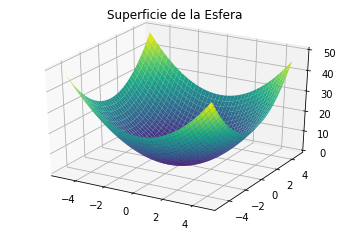

In [1]:
# Graficamos la superficie de la función
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Generamos valores para Y y X.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la Esfera');

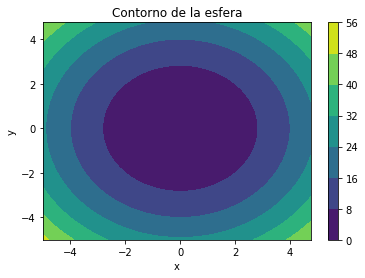

In [2]:
# Graficamos la gráfica de contorno de la función de la esfera 
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Contorno de la esfera')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Gradiente de la función

Recordemos que el gradiente de una función multivariada se define cómo:

$$
\nabla f(\textbf{x})=  \begin{bmatrix}
\frac{\partial f(\textbf{x})}{\partial x_1},\frac{\partial f(\textbf{x})}{\partial x_2},\dots,\frac{\partial f(\textbf{x})}{\partial x_n}
\end{bmatrix}
$$

Para nuestra función objetivo de la esfera, las derivadas parciales son

$$
\frac{\partial f(x,y)}{\partial x} = 2x
$$

$$
\frac{\partial f(x,y)}{\partial y} = 2y
$$

El gradiente es

$$
\nabla f(x,y) = \begin{bmatrix}2x & 2y\end{bmatrix}
$$

In [3]:
# Definimos la función de la esfera
def esfera(X):
    x,y = X
    return x**2 + y**2

# Definimos el gradiente de la función
def gradiente_esfera(X):
    dx = 2*X[0]
    dy = 2*X[1]
    return np.array([dx,dy])

## Algoritmo de descenso del gradiente

In [4]:
def descenso_gradiente(f,g,ε,α_init,c,ρ,xk):
    it = 0
    
    xk_old = xk
    xk = xk - α_init*g(xk)
    
    α = α_init
    
    while abs(f(xk) - f(xk_old)) > ε:
        #print("Iteración {}".format(it))
        # Calculamos tamaño de paso
        while f(xk - α*g(xk)) < f(xk) - c*ρ*(g(xk) @ g(xk)):
            α = ρ * α
    
        xk_old = xk
        xk = xk - α*g(xk)
        it += 1
    return xk

In [5]:
# Definimos los parámetros iniciales
ε = 0.0000001
α_init = 0.2
c = 0.5
ρ = 0.5

xk = np.array([2,2])

descenso_gradiente(esfera,gradiente_esfera,ε,α_init,c,ρ,xk)

array([0.00012187, 0.00012187])

## Función objetivo: Rosenbrock

$$
f(x,y) = (a-x)^2 + b(y - x^2)^2
$$

* Mínimo global:

$$
f(x,y)=(a,a^2)=0
$$

Usualmente se toma $a=1$ y $b=100$.

* Espacio de búsqueda:

$$
\infty \leq x_i \leq \infty, 1 \leq i \leq n
$$

* Gradiente:

$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
2(x-a) -4bx(y-x^2) \\
2b(y-x^2)
\end{bmatrix} 
$$

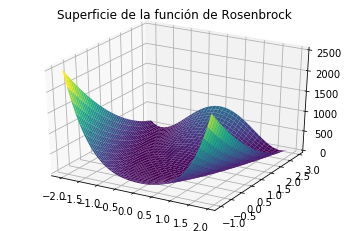

In [6]:
# Generamos valores para Y y X.
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (1-X)**2 + 100*(Y-X**2)**2


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función de Rosenbrock');

 

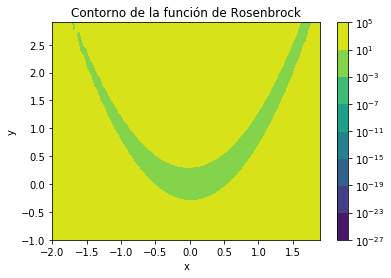

In [7]:
# Graficamos la gráfica de contorno de la función de la esfera 
from matplotlib import ticker, cm


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z,locator=ticker.LogLocator())
fig.colorbar(cp)
ax.set_title('Contorno de la función de Rosenbrock')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [8]:
# Modificamos la función objetivo para que acepte vectores
def rosenbrock(X):
    return (1-X[0])**2 + 100*(X[1]-X[0]**2)**2

def gradiente_rosenbrock(X):
    dx = 2*(X[0]-1) - 4*100*X[0]*(X[1]-X[0]**2)
    dy = 2*100*(X[1]-X[0]**2)
    return np.array([dx,dy])

In [9]:
# Definimos los parámetros iniciales
ε_ros = 0.00000001
α_init_ros = 0.00002
c_ros = 0.5
ρ_ros = 0.5

xk_ros = np.array([0.2,0.2])

descenso_gradiente(rosenbrock,gradiente_rosenbrock,ε_ros,α_init_ros,c_ros,ρ_ros,xk_ros)

array([0.97548924, 0.95147971])

## Función objetivo: Himmelblau

$$
f(x,y) = (x^2 + y -11)^2 + (x + y^2 -7)^2
$$

* Mínimos locales:
$$
\begin{align}
	\min \begin{cases} 
      f(3.0,2.0) &= 0 \\
      f(-2.805118,3.131312) &=0 \\
      f(-3.779310,-3.283186) &=0\\
	  f(3.584428,-1.848126)&=0
   \end{cases}
\end{align}
$$

* Espacio de búsqueda:

$$
-5 \leq x,y \leq 5
$$

* Gradiente:

$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
4x (x^2 + y - 11) + 2(x + y^2 - 7) \\
2(x^2 + y - 11) + 4  y  (x + y^2 - 7)
\end{bmatrix} 
$$

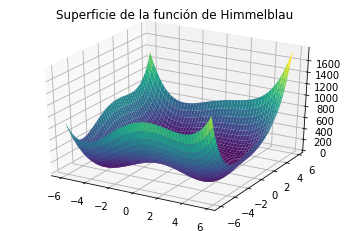

In [10]:
# Generamos valores para Y y X.
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y -11)**2 + (X + Y**2 -7)**2


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función de Himmelblau');

/home/milo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  after removing the cwd from sys.path.


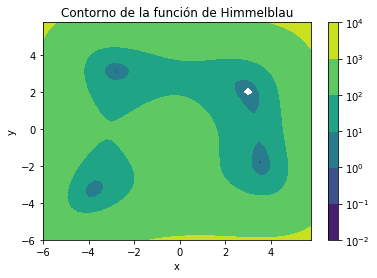

In [11]:
# Graficamos la gráfica de contorno de la función de la Himmelblau

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z,locator=ticker.LogLocator())
fig.colorbar(cp)
ax.set_title('Contorno de la función de Himmelblau')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [12]:
def himmelblau(X):
    return (X[0]**2 + X[1] -11)**2 + (X[0] + X[1]**2 -7)**2

def gradiente_himmelblau(X):
    dx = 4 * X[0] * (X[0]**2 + X[1] - 11) + 2 * (X[0] + X[1]**2 - 7)
    dy = 2 * (X[0]**2 + X[1] - 11) + 4 * X[1] * (X[0] + X[1]**2 - 7)
    return np.array([dx,dy])

In [13]:
# Definimos los parámetros iniciales
ε_himm = 0.000001
α_init_himm = 0.000002
c_himm = 0.5
ρ_himm = 0.5

xk_himm = [-3,3]

descenso_gradiente(himmelblau,gradiente_himmelblau,ε_himm,α_init_himm,c_himm,ρ_himm,xk_himm)

array([-2.81485868,  3.12773527])

## Regresión lineal 

* Modelo: 

$$
f(x) = m \cdot x + b
$$

* Función de pérdida : 

$$
L(m,b)=\frac{1}{n} \cdot \sum_{i=1}^n (y_i - m \cdot x_i-b)^2
$$

* Espacio de búsqueda:

$$
-\infty \leq x_i,y_i \leq \infty
$$

* Gradiente:

$$
\nabla L = \begin{bmatrix} 
			\frac{\partial J}{\partial b} \\
			\frac{\partial J}{\partial m}
			\end{bmatrix} =
			\begin{bmatrix}
			\frac{-2}{n} \cdot \sum_{i=1}^n (y_i - m \cdot x_i-b)\\
			\frac{-2}{n} \cdot \sum_{i=1}^n x_i \cdot (y_i - m \cdot x_i-b)
			\end{bmatrix}
$$

In [14]:
def loss_lin_reg(params,X,y):
    n = len(X)
    return 1/n *(sum([y_i-(params[0]*x_i)-params[1] for y_i,x_i in zip(y,X)]))

def gradiente_lin_reg(params,X,y):
    n = len(X)
    db = -2/n *(sum([y_i-(params[0]*x_i)-params[1] for y_i,x_i in zip(y,X)]))
    dm = -2/n *(sum([x_i*(y_i-(params[0]*x_i)-params[1]) for y_i,x_i in zip(y,X)]))
    return np.array([dm,db])

def descenso_gradiente_lin_reg(f,g,ε,α_init,c,ρ,xk,X,y):
    it = 0
 
    xk_old = xk
    xk = xk - α_init*g(xk, X, y)
    
    α = α_init
    
    while abs(f(xk,X,y) - f(xk_old,X,y)) > ε:
        #print("Iteración {}".format(it))
        pk = -1*g(xk,X,y)
        # Calculamos tamaño de paso
        α = α_init
        while f(xk - α*g(xk, X, y),X,y) < f(xk,X,y) -c*ρ*(g(xk, X, y) @ g(xk, X, y)):
            α = ρ * α
    
        xk_old = xk
        xk = xk - α*g(xk, X, y)
        it += 1
    return xk
        

Text(0, 0.5, 'y')

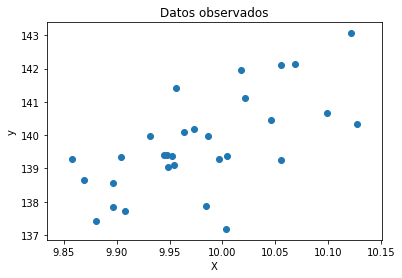

In [15]:
# Simulamos los datos de la regresión lineal
import matplotlib.pyplot as plt

n = 30
μ,σ = 10, 0.1
X = np.random.normal(μ, σ, n)
ϵ = np.random.normal(0, 1, n)

y = 40 + 10*X  + ϵ

plt.scatter(X, y)
plt.title("Datos observados")
plt.xlabel("X")
plt.ylabel("y")

In [16]:
# Definimos los parámetros iniciales
ε_linreg = 0.000001
α_init_linreg = 0.000002
c_linreg = 0.5
ρ_linreg = 0.5

xk_linreg = [5,5]

xk_linreg = descenso_gradiente_lin_reg(loss_lin_reg,gradiente_lin_reg,ε_linreg,
                                       α_init_linreg,c_linreg,ρ_linreg,xk_linreg,X,y)

Text(0, 0.5, 'y')

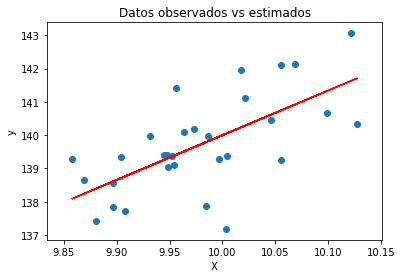

In [17]:
b̂ = xk_linreg[0]
m̂ = xk_linreg[1]
ŷ = m̂ + b̂*X;

plt.scatter(X, y, label ="y")
plt.plot(X,ŷ, label ="y_hat",color="red")
plt.title("Datos observados vs estimados")
plt.xlabel("X")
plt.ylabel("y")

In [18]:
b̂,m̂

(13.415477858941001, 5.843311334410253)

In [19]:
#!pip install sklearn
from sklearn.linear_model import LinearRegression

# Agregamos un nuevo eje al arreglo X
X = X[:, np.newaxis]
reg = LinearRegression().fit(X, y)

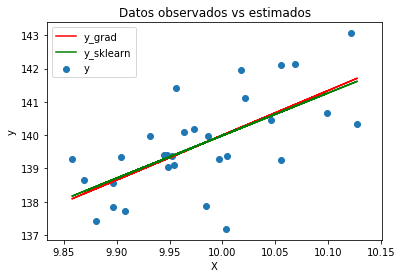

In [20]:
m̂_skt,b̂_skt = reg.intercept_, reg.coef_
ŷ_skt = m̂_skt + b̂_skt*X;

plt.scatter(X, y, label ="y")
plt.plot(X,ŷ, label ="y_grad",color="red")
plt.plot(X,ŷ_skt, label ="y_sklearn",color="green")
plt.title("Datos observados vs estimados")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

## Función objetivo: Ackley

$$
f(x,y) = -20 *\exp [-0.2 \sqrt{0.5(x^2 + y^2)}] - \exp[0.5(\cos 2\pi x) + \cos 2\pi y)] + e + 20
$$

* Mínimo global:

$$
f(0,0) = 0
$$

* Espacio de búsqueda:

$$
-5 \leq x,y \leq 5
$$

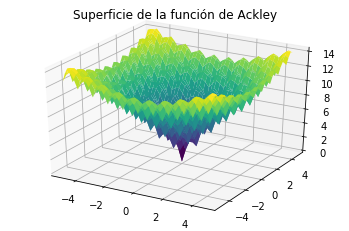

In [21]:
# Generamos valores para Y y X.
from math import e,pi

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = -20*e**(-0.2*(0.5*(X**2+Y**2))**(1/2) ) -e**(0.5*(np.cos(2*pi*X)+np.cos(2*pi*Y)))+e+20


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Superficie de la función de Ackley');

 


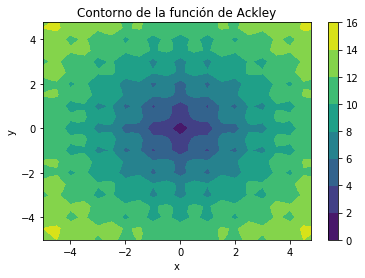

In [22]:
# Graficamos la gráfica de contorno de la función de la esfera 

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) 
ax.set_title('Contorno de la función de Ackley')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [23]:
# pip install numdifftools
import numdifftools as nd

def ackley(X):
    return -20*e**(-0.2*(0.5*(X[0]**2+X[1]**2))**(1/2) ) -e**(0.5*(np.cos(2*pi*X[0])+np.cos(2*pi*X[1])))+e+20

def gradiente_ackley(X):
    return nd.Gradient(ackley)(X)


In [24]:
# Definimos los parámetros iniciales
ε_ack = 0.001
α_init_ack = 0.6
c_ack = 0.5
ρ_ack = 0.5

xk_ack = np.array([4,4])

descenso_gradiente(ackley,gradiente_ackley,ε_ack,α_init_ack,c_ack,ρ_ack,xk_ack)

array([2.97697317, 2.97697317])